# **Implementing Linear Regression for Predictive Analysis in Python**

In this project i will show how to perform Linear Regression using Python. We are going to use Boston-Housing datasets that available in UCI Edu.

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository

    CRIM: per capita crime rate by town
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of non-retail business acres per town
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    NOX: nitric oxides concentration (parts per 10 million)
    RM: average number of rooms per dwelling
    AGE: proportion of owner-occupied units built prior to 1940
    DIS: weighted distances to ﬁve Boston employment centers
    RAD: index of accessibility to radial highways
    TAX: full-value property-tax rate per $10,000
    PTRATIO: pupil-teacher ratio by town 12.
    B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13.
    LSTAT: % lower status of the population
    MEDV: Median value of owner-occupied homes in $1000s


## Step 1 : Preparation

In [10]:
## Import Required Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.precision', 2)

In [2]:
## Loading Datasets
df = pd.read_csv('housing.data',
                 delim_whitespace=True,
                 header=None)

In [3]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [11]:
## Initial Analysis on Datasets
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Initial Analysis Output :
- Datasets consist of 506 Rows and 14 Columns
- Datasets only contain numerical data types
- There's no missing values in the datasets

## Step 2 : EDA

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


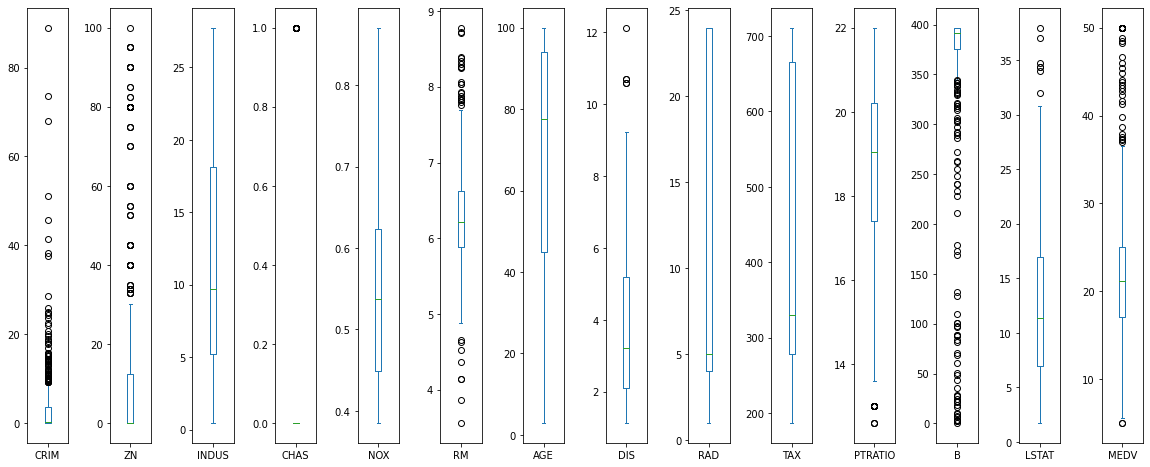

In [7]:
## Univariate Analysis
df.plot(kind='box', subplots=True, sharey=False, figsize=(20,8))
plt.subplots_adjust(wspace=1)
None

Insight :
- There's some heavily-skewed columns : CRIM, ZN, and B

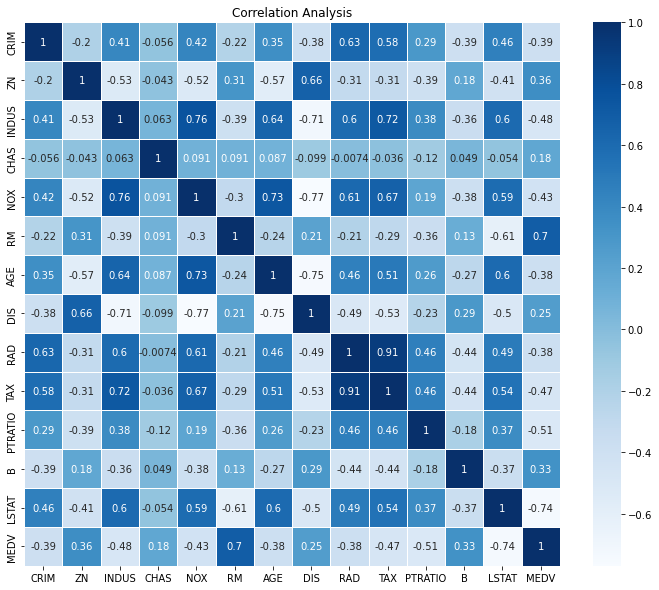

In [19]:
## Bivariate Analysis

plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(), annot=True, linecolor='white', linewidths=1, cmap='Blues')
plt.title('Correlation Analysis')
plt.show()

Insight :
- LSAT, RM, PTRATIO are correlated with MEDV with correlation coef value > 0.5 or < -0.5 

## Step 3 : Building Model

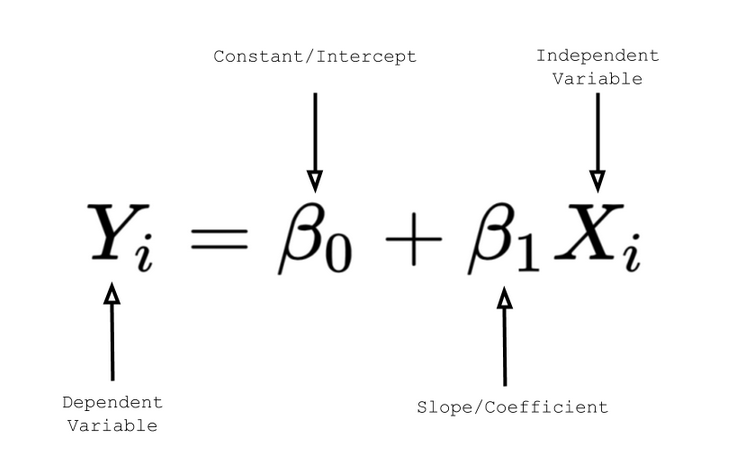

In [73]:
## Import required library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [54]:
## Determine Target and Feature Variable
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

## Split datasets into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [75]:
## Building Model
model = LinearRegression()

## Fit Model into Training Datasets
model.fit(X_train, y_train)

## Predict Train and Test Data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

## Evaluate Model Performance
## Calculate Mean Squared Error
mse_train = mean_squared_error(y_true = y_train, y_pred= y_train_predict)
mse_test = mean_squared_error(y_true = y_test, y_pred = y_test_predict)

## Calculate R2 Score
r2_train = r2_score(y_true = y_train, y_pred= y_train_predict)
r2_test = r2_score(y_true = y_test, y_pred = y_test_predict)

print(f'MSE Train Data :{round(mse_train,2)}')
print(f'MSE Test Data :{round(mse_test,2)}')
print('')
print(f'r2 Train Data :{round(r2_train,2)}')
print(f'r2 Test Data :{round(r2_test,2)}')

MSE Train Data :43.0
MSE Test Data :46.14

r2 Train Data :0.51
r2 Test Data :0.37


Now we are going to make other Linear Regression Model so we can compared the performance and choose the best model for our problem.
- Linear Model using other feature
- Robust Regression that can handle outlier

In [79]:
## Perform Random Sample Consensus
## Import RANSAC Regressor
from sklearn.linear_model import RANSACRegressor

## Determine Target and Feature Variable
x = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

## Split datasets into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Building Model
model = RANSACRegressor()

## Fit Model into Training Datasets
model.fit(X_train, y_train)

## Predict Train and Test Data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

## Evaluate Model Performance
## Calculate Mean Squared Error
mse_train = mean_squared_error(y_true = y_train, y_pred= y_train_predict)
mse_test = mean_squared_error(y_true = y_test, y_pred = y_test_predict)

## Calculate R2 Score
r2_train = r2_score(y_true = y_train, y_pred= y_train_predict)
r2_test = r2_score(y_true = y_test, y_pred = y_test_predict)

print(f'MSE Train Data :{round(mse_train,2)}')
print(f'MSE Test Data :{round(mse_test,2)}')
print('')
print(f'r2 Train Data :{round(r2_train,2)}')
print(f'r2 Test Data :{round(r2_test,2)}')

MSE Train Data :44.29
MSE Test Data :47.14

r2 Train Data :0.49
r2 Test Data :0.36


In [85]:
## Determine Target and Feature Variable
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

## Split datasets into Train and Test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Building Model
model = LinearRegression()

## Fit Model into Training Datasets
model.fit(X_train, y_train)

## Predict Train and Test Data
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

## Evaluate Model Performance
## Calculate Mean Squared Error
mse_train = mean_squared_error(y_true = y_train, y_pred= y_train_predict)
mse_test = mean_squared_error(y_true = y_test, y_pred = y_test_predict)

## Calculate R2 Score
r2_train = r2_score(y_true = y_train, y_pred= y_train_predict)
r2_test = r2_score(y_true = y_test, y_pred = y_test_predict)

print(f'MSE Train Data :{round(mse_train,2)}')
print(f'MSE Test Data :{round(mse_test,2)}')
print('')
print(f'r2 Train Data :{round(r2_train,2)}')
print(f'r2 Test Data :{round(r2_test,2)}')

MSE Train Data :39.76
MSE Test Data :33.52

r2 Train Data :0.54
r2 Test Data :0.54


Summary : 

After performing 3 different simple linear regression model we can conclude that performing Linear Regression using 'LSTAT' columns as independent variable resulting the most accurate model with MSE 33.52